### 1. Installing Required Libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

### 2. Extracting Data from a Website

In [2]:
BASE_URL = "http://quotes.toscrape.com/"
START_PAGE = "/page/1/"

def scrape_quotes():
    quotes_data = []
    next_page = START_PAGE
    visited_pages = set()

    while next_page:
        if next_page in visited_pages:
            print(f"Detected a loop at {next_page}, exiting...")
            break
        visited_pages.add(next_page)

        url = BASE_URL + next_page
        print(f"Scraping {url}")

        try:
            response = requests.get(url, timeout=5)
            response.raise_for_status()  # Catch 404, 500, etc.
        except requests.RequestException as e:
            print(f"Request failed: {e}")
            break

        soup = BeautifulSoup(response.text, "html.parser")
        quotes = soup.find_all("div", class_="quote")

        if not quotes:
            print(f"No quotes found on {url}, exiting...")
            break

        for quote in quotes:
            try:
                text = quote.find("span", class_="text").get_text(strip=True)
                author = quote.find("small", class_="author").get_text(strip=True)
                tags = [tag.get_text(strip=True) for tag in quote.find_all("a", class_="tag")]
                quotes_data.append({
                    "Quote": text,
                    "Author": author,
                    "Tags": ", ".join(tags)
                })
            except AttributeError as e:
                print(f"Error parsing quote block: {e}")
                continue

        next_btn = soup.find("li", class_="next")
        next_page = next_btn.find("a")["href"] if next_btn else None

    return quotes_data

### 3. Storing data into a CSV file

In [3]:
def save_to_csv(data, filename="quotes.csv"):
    if not data:
        print("No data to save.")
        return

    try:
        with open(filename, "w", newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=["Quote", "Author", "Tags"])
            writer.writeheader()
            writer.writerows(data)
        print(f"Saved {len(data)} quotes to {filename}")
    except Exception as e:
        print(f"Failed to save file: {e}")

if __name__ == "__main__":
    scraped_data = scrape_quotes()
    save_to_csv(scraped_data)

Scraping http://quotes.toscrape.com//page/1/
Scraping http://quotes.toscrape.com//page/2/
Scraping http://quotes.toscrape.com//page/3/
Scraping http://quotes.toscrape.com//page/4/
Scraping http://quotes.toscrape.com//page/5/
Scraping http://quotes.toscrape.com//page/6/
Scraping http://quotes.toscrape.com//page/7/
Scraping http://quotes.toscrape.com//page/8/
Scraping http://quotes.toscrape.com//page/9/
Scraping http://quotes.toscrape.com//page/10/
Saved 100 quotes to quotes.csv


### 4. Performing Exploratory Data Analysis (EDA)

In [6]:
import pandas as pd
file_path = r'C:\Users\YOCHANA\Downloads\webscraping_with_EDA\quotes.csv'
data = pd.read_csv(file_path)
data.head()

,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


In [16]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 5. Word Cloud Visualization

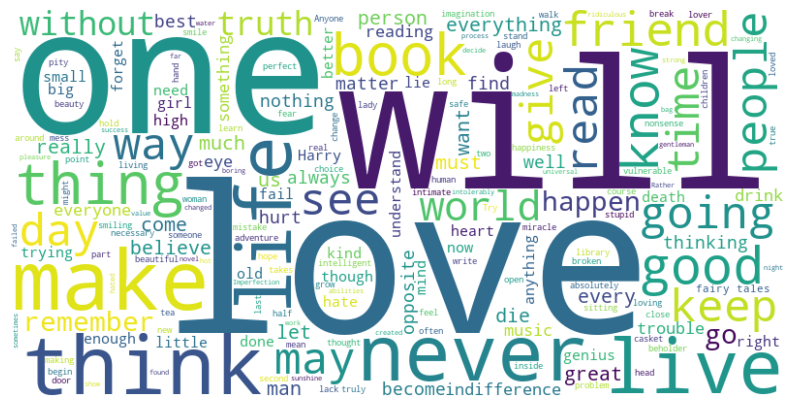

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_quotes = " ".join(data['Quote'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_quotes)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 6. Top 10 Most Quoted Authors

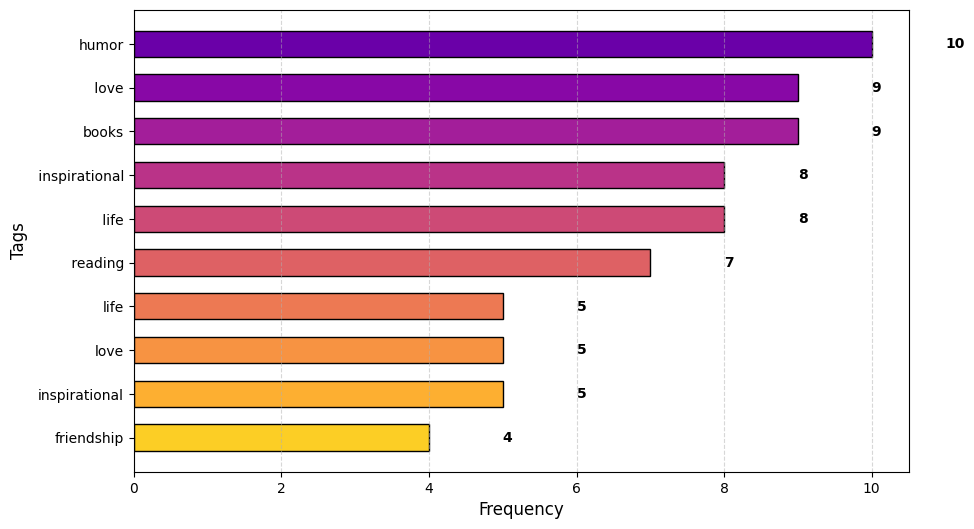

In [22]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

tag_counts = data['Tags'].str.split(',').explode().value_counts()
top_tags = tag_counts.head(10)

# Generate gradient colors
colors = cm.plasma(np.linspace(0.2, 0.9, len(top_tags)))  

plt.figure(figsize=(10, 6))
bars = plt.barh(top_tags.index, top_tags.values, color=colors, edgecolor="black", height=0.6)

# Add values at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(bar.get_width()), va='center', fontsize=10, fontweight="bold")

plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Tags", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.show()


### 7. Top 10 Most Common Tags

c:\Users\YOCHANA\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


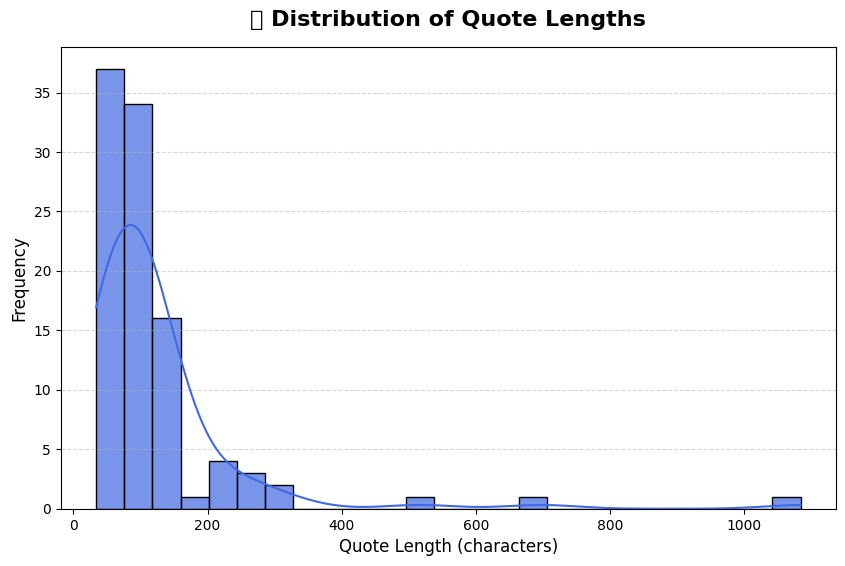

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column for quote length
data['Quote Length'] = data['Quote'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(
    data['Quote Length'], 
    bins=25, 
    kde=True, 
    color="royalblue", 
    edgecolor="black", 
    alpha=0.7
)

# Styling
plt.title("Distribution of Quote Lengths", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Quote Length (characters)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()
